
####ANALYSIS OF STACK OVERFLOW DATA

---


####ENSF 612 PROJECT
####15 December 2023


---


####Amey Brahme 
####Tej Bal 



---
Link to Original Colab file: https://colab.research.google.com/drive/19O3Ez_roQFQOp96SNgZYsVqEuYR1X0pU?usp=sharing


###IMPORT ALL REQUIRED LIBRARIES

In [16]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import statistics
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import plotly.graph_objects as px

###Import csv data in pandas dataframe

In [17]:
df = pd.read_csv("answers.csv")
print(df.shape)
df.head()


(263540, 12)


Unnamed: 0     qid        i  qs          qt  \
0           1  563355  62701.0   0  1235000081   
1           2  563355  62701.0   0  1235000081   
2           3  563356  15842.0  10  1235000140   
3           4  563356  15842.0  10  1235000140   
4           5  563356  15842.0  10  1235000140   

                             tags   qvc  qac     aid        j  as          at  
0   php,error,gd,image-processing   220    2  563372  67183.0   2  1235000501  
1   php,error,gd,image-processing   220    2  563374  66554.0   0  1235000551  
2  lisp,scheme,subjective,clojure  1047   16  563358  15842.0   3  1235000177  
3  lisp,scheme,subjective,clojure  1047   16  563413    893.0  18  1235001545  
4  lisp,scheme,subjective,clojure  1047   16  563454  11649.0   4  1235002457

###Update Column Headers

In [18]:
new_column_names = ['Sr No', 'Unique Question ID', 'User ID of Questioner', 'Score of the Question', 'Time of the question', 'tags',
'Number of views of this question', 'Number of answers for this question', 'Unique answer id', 'User id of answerer', 'Score of the answer',
'Time of the answer']
df.columns = new_column_names
df.head()


Sr No  Unique Question ID  User ID of Questioner  Score of the Question  \
0      1              563355                62701.0                      0   
1      2              563355                62701.0                      0   
2      3              563356                15842.0                     10   
3      4              563356                15842.0                     10   
4      5              563356                15842.0                     10   

   Time of the question                            tags  \
0            1235000081   php,error,gd,image-processing   
1            1235000081   php,error,gd,image-processing   
2            1235000140  lisp,scheme,subjective,clojure   
3            1235000140  lisp,scheme,subjective,clojure   
4            1235000140  lisp,scheme,subjective,clojure   

   Number of views of this question  Number of answers for this question  \
0                               220                                    2   
1                               220                                    2   
2                              1047                                   16   
3                              1047                                   16   
4                              1047                                   16   

   Unique answer id  User id of answerer  Score of the answer  \
0            563372              67183.0                    2   
1            563374              66554.0                    0   
2            563358              15842.0                    3   
3            563413                893.0                   18   
4            563454              11649.0                    4   

   Time of the answer  
0          1235000501  
1          1235000551  
2          1235000177  
3          1235001545  
4          1235002457

###Identify Missing values

In [19]:
df_filled = df.fillna(np.nan)
missing_values = df.isnull().sum()
print("Count of Missing Values:")
print(missing_values)

Count of Missing Values:
Sr No                                    0
Unique Question ID                       0
User ID of Questioner                  276
Score of the Question                    0
Time of the question                     0
tags                                     0
Number of views of this question         0
Number of answers for this question      0
Unique answer id                         0
User id of answerer                    140
Score of the answer                      0
Time of the answer                       0
dtype: int64


###Dropping Columns with NaN Values

In [20]:
print("Original DataFrame Shape:")
print(df.shape)
df = df.dropna(axis = 1)
print("DataFrame Shape after dropping Columns with missing values:")
print(df.shape)

Original DataFrame Shape:
(263540, 12)
DataFrame Shape after dropping Columns with missing values:
(263540, 10)


###Data Transformation

In [21]:
df["Response Time"]= (df['Time of the answer'] - df['Time of the question'])/60
mins=df.groupby("Unique Question ID")["Response Time"].min()
df['First Answer'] = df.apply(lambda x: 1 if x['Response Time'] == mins[x['Unique Question ID']] else 0, axis=1)
df.head()

Sr No  Unique Question ID  Score of the Question  Time of the question  \
0      1              563355                      0            1235000081   
1      2              563355                      0            1235000081   
2      3              563356                     10            1235000140   
3      4              563356                     10            1235000140   
4      5              563356                     10            1235000140   

                             tags  Number of views of this question  \
0   php,error,gd,image-processing                               220   
1   php,error,gd,image-processing                               220   
2  lisp,scheme,subjective,clojure                              1047   
3  lisp,scheme,subjective,clojure                              1047   
4  lisp,scheme,subjective,clojure                              1047   

   Number of answers for this question  Unique answer id  Score of the answer  \
0                                    2            563372                    2   
1                                    2            563374                    0   
2                                   16            563358                    3   
3                                   16            563413                   18   
4                                   16            563454                    4   

   Time of the answer  Response Time  First Answer  
0          1235000501       7.000000             1  
1          1235000551       7.833333             0  
2          1235000177       0.616667             1  
3          1235001545      23.416667             0  
4          1235002457      38.616667             0

###Correlation Matrix (EDA)

<ipython-input-22-03dc7fce538c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


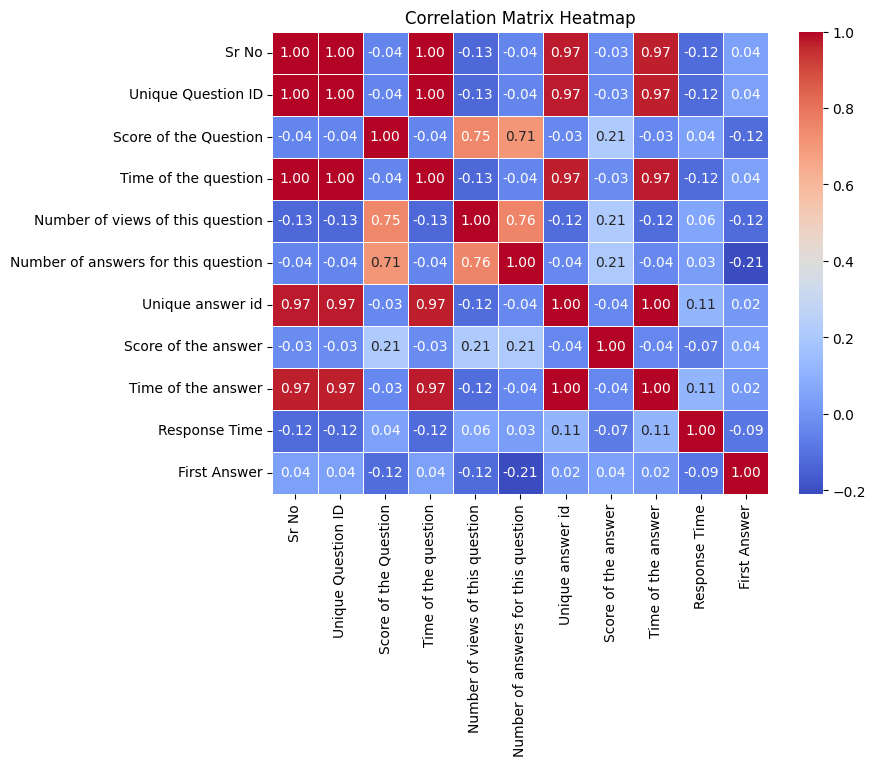

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

###Identify Outliers Using Visualization

In [23]:
plot = px.Figure()
plot.add_trace(px.Box(x=df['Number of answers for this question'],  name="Number of answers for this question" ))
plot.add_trace(px.Box(x=df['Score of the Question'], name = "Score of the Question"))
plot.add_trace(px.Box(x=df['Score of the answer'], name = "Score of the answer"))
plot.show()

In [24]:
plot = px.Figure()
plot.add_trace(px.Box(x=df['Response Time'], name = "Response Time"))
plot.show()

In [25]:
df['Response Time'].describe()

count    263540.000000
mean       2229.431239
std       10739.695940
min      -18620.866667
25%           7.350000
50%          21.350000
75%         139.008333
max      154559.000000
Name: Response Time, dtype: float64

###Install Spark

In [26]:
!pip install pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark
from pyspark.sql.functions import col

import pyspark
import pandas as pd
from pyspark.sql.functions import *

spark = SparkSession.builder.appName("ensf612Proj").getOrCreate()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=d0cfead7b8f7e0f7ae3609db8684bd3afa93852b446ee624b4ccf74d24da6210
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


###Setup for Modelling

In [27]:
df_pyspark=spark.createDataFrame(df)
df_pyspark.show()

null_counts = df_pyspark.select([col(c).isNull().cast("int").alias(c) for c in df_pyspark.columns])
total_null_counts = null_counts.agg(*[sum(c).alias(c) for c in null_counts.columns])
total_null_counts.show()

# schema check
df_pyspark.printSchema()
print("rows=",df_pyspark.count())

+-----+------------------+---------------------+--------------------+--------------------+--------------------------------+-----------------------------------+----------------+-------------------+------------------+------------------+------------+
|Sr No|Unique Question ID|Score of the Question|Time of the question|                tags|Number of views of this question|Number of answers for this question|Unique answer id|Score of the answer|Time of the answer|     Response Time|First Answer|
+-----+------------------+---------------------+--------------------+--------------------+--------------------------------+-----------------------------------+----------------+-------------------+------------------+------------------+------------+
|    1|            563355|                    0|          1235000081|php,error,gd,imag...|                             220|                                  2|          563372|                  2|        1235000501|               7.0|           1|
|    2| 

###Explode Tags

In [28]:
# Separate tags
df_exploded = df_pyspark.withColumn("tag", explode(split(df_pyspark["tags"], ",")))
df_exploded = df_exploded.drop("tags")
df_exploded.show()
print("rows:",df_exploded.count())
# print("negative response times:",df_exploded.filter(df_exploded['Response Time'] < 0).count())
# print("as outliers:",df_exploded.filter(df_exploded['Score of the Question'] >150).count())
# print("qs outliers:",df_exploded.filter((df_exploded['Score of the Question'] > 150) | (df_exploded['Score of the Question'] <-30)).count())

+-----+------------------+---------------------+--------------------+--------------------------------+-----------------------------------+----------------+-------------------+------------------+------------------+------------+----------------+
|Sr No|Unique Question ID|Score of the Question|Time of the question|Number of views of this question|Number of answers for this question|Unique answer id|Score of the answer|Time of the answer|     Response Time|First Answer|             tag|
+-----+------------------+---------------------+--------------------+--------------------------------+-----------------------------------+----------------+-------------------+------------------+------------------+------------+----------------+
|    1|            563355|                    0|          1235000081|                             220|                                  2|          563372|                  2|        1235000501|               7.0|           1|             php|
|    1|            56335

In [30]:
# Remove negative response times
df_filtered = df_exploded.filter(df_exploded['Response Time'] >= 0)

# remove answer score outliers based on box plot

df_filtered = df_filtered.filter(df_filtered['Score of the answer'] < 150)

# remove question score outliers
df_filtered = df_filtered.filter((df_filtered['Score of the Question'] < 150) | (df_filtered['Score of the Question'] >-32))

# Keep only the first answer
df_filtered = df_filtered.where(df_filtered['First Answer'] == 1)
df_filtered.filter(df_filtered['Response Time'] < 0).count()
df_filtered.show()
df_filtered.count()


+-----+------------------+---------------------+--------------------+--------------------------------+-----------------------------------+----------------+-------------------+------------------+------------------+------------+--------------------+
|Sr No|Unique Question ID|Score of the Question|Time of the question|Number of views of this question|Number of answers for this question|Unique answer id|Score of the answer|Time of the answer|     Response Time|First Answer|                 tag|
+-----+------------------+---------------------+--------------------+--------------------------------+-----------------------------------+----------------+-------------------+------------------+------------------+------------+--------------------+
|    1|            563355|                    0|          1235000081|                             220|                                  2|          563372|                  2|        1235000501|               7.0|           1|                 php|
|    1| 

254505

In [33]:
pdf = df_filtered.toPandas()
plot = px.Figure()
plot.add_trace(px.Box(x=pdf['Response Time'],  name="Response Time" ))
plot.show()

###Linear And Random Forest Tree (RFT) Models (Initial Feature Selection)

In [34]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import LinearRegression, RandomForestRegressor
from pyspark.ml import Pipeline



#Indexing the "tag" column
string_indexer = StringIndexer(inputCol="tag", outputCol="tags indexed")

# One-hot encoding the indexed "tag" column
one_hot_encoder = OneHotEncoder(inputCol="tags indexed", outputCol="tags encoded")

# Assemble the features into a vector
feature_columns = ["Score of the Question", "Number of views of this question", "Number of answers for this question", "Score of the answer", "tags encoded"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Define the machine learning models
regressor = LinearRegression(featuresCol="features", labelCol="Response Time")
rft = RandomForestRegressor(featuresCol="features", labelCol="Response Time", numTrees=1)

# Create a pipeline for the transformation and model training steps
pipeline = Pipeline(stages=[string_indexer, one_hot_encoder, assembler, regressor])
pipeline2 = Pipeline(stages=[string_indexer, one_hot_encoder, assembler, rft])

# Fit the pipeline to the data
model = pipeline.fit(df_filtered)
model2 = pipeline2.fit(df_filtered)

# Make predictions
predictions = model.transform(df_filtered)
predictions2 = model2.transform(df_filtered)

###Linear and RFT Models (Tags only)

In [35]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import LinearRegression, RandomForestRegressor
from pyspark.ml import Pipeline



#Indexing the "tag" column
string_indexer = StringIndexer(inputCol="tag", outputCol="tags indexed")

# One-hot encoding the indexed "tag" column
one_hot_encoder = OneHotEncoder(inputCol="tags indexed", outputCol="tags encoded")

# Assemble the features into a vector
feature_columns = ["tags encoded"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Define the machine learning models
regressor = LinearRegression(featuresCol="features", labelCol="Response Time")
rft = RandomForestRegressor(featuresCol="features", labelCol="Response Time", numTrees=1)

# Create a pipeline for the transformation and model training steps
pipeline = Pipeline(stages=[string_indexer, one_hot_encoder, assembler, regressor])
pipeline2 = Pipeline(stages=[string_indexer, one_hot_encoder, assembler, rft])

# Fit the pipeline to the data
model = pipeline.fit(df_filtered)
model2 = pipeline2.fit(df_filtered)

# Make predictions
predictions3 = model.transform(df_filtered)
predictions4 = model2.transform(df_filtered)

In [36]:
from pyspark.ml.evaluation import RegressionEvaluator

# Create RegressionEvaluator for RMSE
evaluator_rmse = RegressionEvaluator(
    labelCol="Response Time",
    predictionCol="prediction",
    metricName="rmse"
)

# Create RegressionEvaluator for MSE
evaluator_mse = RegressionEvaluator(
    labelCol="Response Time",
    predictionCol="prediction",
    metricName="mse"
)

# Create RegressionEvaluator for MAE
evaluator_mae = RegressionEvaluator(
    labelCol="Response Time",
    predictionCol="prediction",
    metricName="mae"
)

# Calculate and print RMSE, MSE, MAE for Linear Regression
rmse_linear = evaluator_rmse.evaluate(predictions)
mse_linear = evaluator_mse.evaluate(predictions)
mae_linear = evaluator_mae.evaluate(predictions)

# Calculate and print RMSE, MSE, MAE for Linear Regression tags only
rmse_linear2 = evaluator_rmse.evaluate(predictions3)
mse_linear2 = evaluator_mse.evaluate(predictions3)
mae_linear2 = evaluator_mae.evaluate(predictions3)


#Calculate and print RMSE, MSE, MAE for Random Forest Regression
rmse_rf = evaluator_rmse.evaluate(predictions2)
mse_rf = evaluator_mse.evaluate(predictions2)
mae_rf = evaluator_mae.evaluate(predictions2)

#Calculate and print RMSE, MSE, MAE for Random Forest Regression for tags only
rmse_rf2 = evaluator_rmse.evaluate(predictions4)
mse_rf2 = evaluator_mse.evaluate(predictions4)
mae_rf2 = evaluator_mae.evaluate(predictions4)


In [37]:
print("Linear Regression Metrics (5 Features):")
print(f"RMSE: {rmse_linear}")
print(f"MSE: {mse_linear}")
print(f"MAE: {mae_linear}")
print("\n")

print("Linear Regression Metrics (Tags Only):")
print(f"RMSE: {rmse_linear2}")
print(f"MSE: {mse_linear2}")
print(f"MAE: {mae_linear2}")
print("\n")

print("Random Forest Regression Metrics(5 features):")
print(f"RMSE: {rmse_rf}")
print(f"MSE: {mse_rf}")
print(f"MAE: {mae_rf}")

print("\nRandom Forest Regression Metrics (Tags Only):")
print(f"RMSE: {rmse_rf2}")
print(f"MSE: {mse_rf2}")
print(f"MAE: {mae_rf2}")

Linear Regression Metrics (5 Features):
RMSE: 5431.055514165804
MSE: 29496363.997950792
MAE: 1346.660062140248


Linear Regression Metrics (Tags Only):
RMSE: 5447.465085069744
MSE: 29674875.853053916
MAE: 1269.3618828067822


Random Forest Regression Metrics(5 features):
RMSE: 5586.709649793916
MSE: 31211324.71110045
MAE: 1291.4687220153428

Random Forest Regression Metrics (Tags Only):
RMSE: 5778.023132503486
MSE: 33385551.319745388
MAE: 1430.2917541114537


###Setup for hyperparameter tuning

In [38]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
# Indexing the "tag" column
string_indexer = StringIndexer(inputCol="tag", outputCol="tags indexed", handleInvalid="skip")

# One-hot encoding the indexed "tag" column
one_hot_encoder = OneHotEncoder(inputCol="tags indexed", outputCol="tags encoded")

# Assemble the features into a vector
feature_columns = ["tags encoded"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Split the data into training and testing sets
(train_data, test_data) = df_filtered.randomSplit([0.8, 0.2], seed=1234)

# Create evaluators
evaluator_rmse = RegressionEvaluator(labelCol="Response Time", predictionCol="prediction", metricName="rmse")
evaluator_mse = RegressionEvaluator(labelCol="Response Time", predictionCol="prediction", metricName="mse")
evaluator_mae = RegressionEvaluator(labelCol="Response Time", predictionCol="prediction", metricName="mae")

###Linear Regression (Hyperparameter Optimization)

In [39]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline

# Define the machine learning models
regressor = LinearRegression(featuresCol="features", labelCol="Response Time")

# Create a pipeline for the transformation and model training steps
pipeline_lr = Pipeline(stages=[string_indexer, one_hot_encoder, assembler, regressor])

# Define hyperparameter grids
param_grid_lr = ParamGridBuilder() \
    .addGrid(regressor.regParam, [0.01, 0.1, 0.5]) \
    .addGrid(regressor.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

# Create CrossValidator for Linear Regression
cross_validator_lr = CrossValidator(estimator=pipeline_lr,
                                    estimatorParamMaps=param_grid_lr,
                                    evaluator=evaluator_rmse,
                                    numFolds=5)

# Fit the CrossValidators to the training data
cv_model_lr = cross_validator_lr.fit(train_data)

# Get the best models
best_model_lr = cv_model_lr.bestModel


In [40]:
# Extract the best linear regression model from the pipeline
best_lr_model = best_model_lr.stages[-1]

# Extract the values of the hyperparameters
best_elastic_net_param = best_lr_model.getElasticNetParam()
best_reg_param = best_lr_model.getRegParam()

# Print the best hyperparameters
print("Best ElasticNetParam for Linear Regression:", best_elastic_net_param)
print("Best RegParam for Linear Regression:", best_reg_param)

Best ElasticNetParam for Linear Regression: 1.0
Best RegParam for Linear Regression: 0.5


In [41]:
predictions_lr = best_model_lr.transform(test_data)

# Random Forest Tree (Hyperparameter Optimization)

In [42]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline

# Define the machine learning models
rft = RandomForestRegressor(featuresCol="features", labelCol="Response Time")


# Create a pipeline for the transformation and model training steps
pipeline_rf = Pipeline(stages=[string_indexer, one_hot_encoder, assembler, rft])

# Define hyperparameter grids
param_grid_rf = ParamGridBuilder() \
    .addGrid(rft.maxDepth, [3, 5]) \
    .addGrid(rft.numTrees, [10, 20]) \
    .build()


# Create CrossValidator for Random Forest Regression
cross_validator_rf = CrossValidator(estimator=pipeline_rf,
                                    estimatorParamMaps=param_grid_rf,
                                    evaluator=evaluator_rmse,
                                    numFolds=3)

# Fit the CrossValidators to the training data
cv_model_rf = cross_validator_rf.fit(train_data)

# Get the best models
best_model_rf = cv_model_rf.bestModel

In [45]:
# Extract the best Random Forest model from the pipeline
best_rf_model = best_model_rf.stages[-1]

# Extract the values of the hyperparameters
best_max_depth = best_rf_model.getMaxDepth()
best_num_trees = best_rf_model.getNumTrees

# Print the best hyperparameters
print("Best MaxDepth for Random Forest:", best_max_depth)
print("Best NumTrees for Random Forest:", best_num_trees)

# Make predictions using the best Random Forest model
predictions_rf = best_model_rf.transform(test_data)

Best MaxDepth for Random Forest: 3
Best NumTrees for Random Forest: 10


In [46]:
# Calculate and print RMSE, MSE, MAE for Linear Regression
rmse_linear = evaluator_rmse.evaluate(predictions_lr)
mse_linear = evaluator_mse.evaluate(predictions_lr)
mae_linear = evaluator_mae.evaluate(predictions_lr)

print("Linear Regression Metrics:")
print(f"RMSE: {rmse_linear}")
print(f"MSE: {mse_linear}")
print(f"MAE: {mae_linear}")
print("\n")

# Calculate and print RMSE, MSE, MAE for Random Forest Regression
rmse_rf = evaluator_rmse.evaluate(predictions_rf)
mse_rf = evaluator_mse.evaluate(predictions_rf)
mae_rf = evaluator_mae.evaluate(predictions_rf)

print("Random Forest Regression Metrics:")
print(f"RMSE: {rmse_rf}")
print(f"MSE: {mse_rf}")
print(f"MAE: {mae_rf}")


Linear Regression Metrics:
RMSE: 5984.093285350076
MSE: 35809372.44777187
MAE: 1382.8997907660923


Random Forest Regression Metrics:
RMSE: 5785.946891706504
MSE: 33477181.433648158
MAE: 1421.1096729400806


###Decision Tree (DT) Model

In [47]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml import Pipeline

# Define the machine learning models
decision_tree = DecisionTreeRegressor(featuresCol="features", labelCol="Response Time")

# Create a pipeline for the transformation and model training steps
pipeline_dt = Pipeline(stages=[string_indexer, one_hot_encoder, assembler, decision_tree])

# Define hyperparameter grids for Decision Tree
# Define hyperparameter grids for Decision Tree
param_grid_dt = ParamGridBuilder() \
    .addGrid(decision_tree.maxDepth, [3, 5]) \
    .addGrid(decision_tree.maxBins, [32, 64]) \
    .build()

# Create CrossValidator for Decision Tree
cross_validator_dt = CrossValidator(estimator=pipeline_dt,
                                    estimatorParamMaps=param_grid_dt,
                                    evaluator=evaluator_rmse,
                                    numFolds=3)

# Fit the CrossValidators to the training data
cv_model_dt = cross_validator_dt.fit(train_data)

# Get the best models
best_model_dt = cv_model_dt.bestModel


In [48]:
# Extract the best Decision Tree model from the pipeline
best_dt_model = best_model_dt.stages[-1]

# Extract the values of the hyperparameters
best_max_depth_dt = best_dt_model.getMaxDepth()
best_max_bins_dt = best_dt_model.getMaxBins()

# Print the best hyperparameters
print("Best MaxDepth for Decision Tree:", best_max_depth_dt)
print("Best MaxBins for Decision Tree:", best_max_bins_dt)

# Make predictions using the best Decision Tree model
predictions_dt = best_model_dt.transform(test_data)


Best MaxDepth for Decision Tree: 3
Best MaxBins for Decision Tree: 32


In [49]:
# Calculate and print RMSE, MSE, MAE for Decision Tree
rmse_dt = evaluator_rmse.evaluate(predictions_dt)
mse_dt = evaluator_mse.evaluate(predictions_dt)
mae_dt = evaluator_mae.evaluate(predictions_dt)

print("Decision Tree Regression Metrics:")
print(f"RMSE: {rmse_dt}")
print(f"MSE: {mse_dt}")
print(f"MAE: {mae_dt}")


Decision Tree Regression Metrics:
RMSE: 5821.74613473563
MSE: 33892728.057309255
MAE: 1427.5583932714505
